# Task 3: Forest Cover Type Classification

Predict the type of forest cover using cartographic and environmental features.

**Workflow:**
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Model Building (Random Forest, XGBoost, etc.)
4. Model Evaluation (confusion matrix, feature importance)
5. Bonus: Handle class imbalance (SMOTE), compare logistic regression vs. decision tree

---

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

> **Note:** Place your dataset file (e.g., `forest_dataset.csv`) in this folder.

In [20]:
# Load dataset
try:
    df = pd.read_csv('forest_dataset.csv')
except FileNotFoundError:
    df = None
    print('Dataset not found. Please place forest_dataset.csv in this folder.')
if df is not None:
    display(df.head())
    print(df.info())
    display(df.describe())

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
 2   2       10000 non-null  int64
 3   3       10000 non-null  int64
 4   4       10000 non-null  int64
 5   5       10000 non-null  int64
 6   6       10000 non-null  int64
 7   7       10000 non-null  int64
 8   8       10000 non-null  int64
 9   9       10000 non-null  int64
 10  10      10000 non-null  int64
 11  11      10000 non-null  int64
 12  12      10000 non-null  int64
 13  13      10000 non-null  int64
 14  14      10000 non-null  int64
 15  15      10000 non-null  int64
 16  16      10000 non-null  int64
 17  17      10000 non-null  int64
 18  18      10000 non-null  int64
 19  19      10000 non-null  int64
 20  20      10000 non-null  int64
 21  21      10000 non-null  int64
 22  22      10000 non-null  int64
 23  23      10000 non-null 

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2960.645900,154.127600,13.98120,269.502800,45.596800,2358.805400,212.382200,223.886000,142.892300,1982.005000,...,0.092300,0.078300,0.002000,0.002900,0.000300,0.000500,0.024000,0.02130,0.012300,2.034100
std,276.101899,111.112044,7.44313,214.741609,57.607363,1564.814207,26.560675,19.443395,37.460182,1307.685368,...,0.289463,0.268657,0.044679,0.053776,0.017319,0.022356,0.153057,0.14439,0.110227,1.378016
min,1866.000000,0.000000,0.00000,0.000000,-147.000000,0.000000,70.000000,88.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,2819.000000,57.000000,9.00000,108.000000,6.000000,1106.750000,199.000000,213.000000,120.000000,1041.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,2996.000000,128.000000,13.00000,218.000000,29.000000,2008.000000,218.000000,227.000000,143.000000,1719.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
75%,3162.000000,254.000000,18.00000,390.000000,68.000000,3330.250000,231.000000,238.000000,167.000000,2542.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
max,3846.000000,359.000000,57.00000,1370.000000,573.000000,7023.000000,254.000000,254.000000,247.000000,7080.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000


## 2. Exploratory Data Analysis (EDA)

Visualize class distribution and feature correlations.

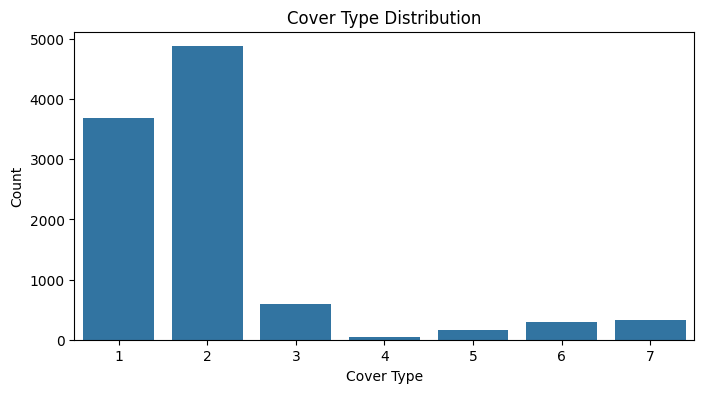

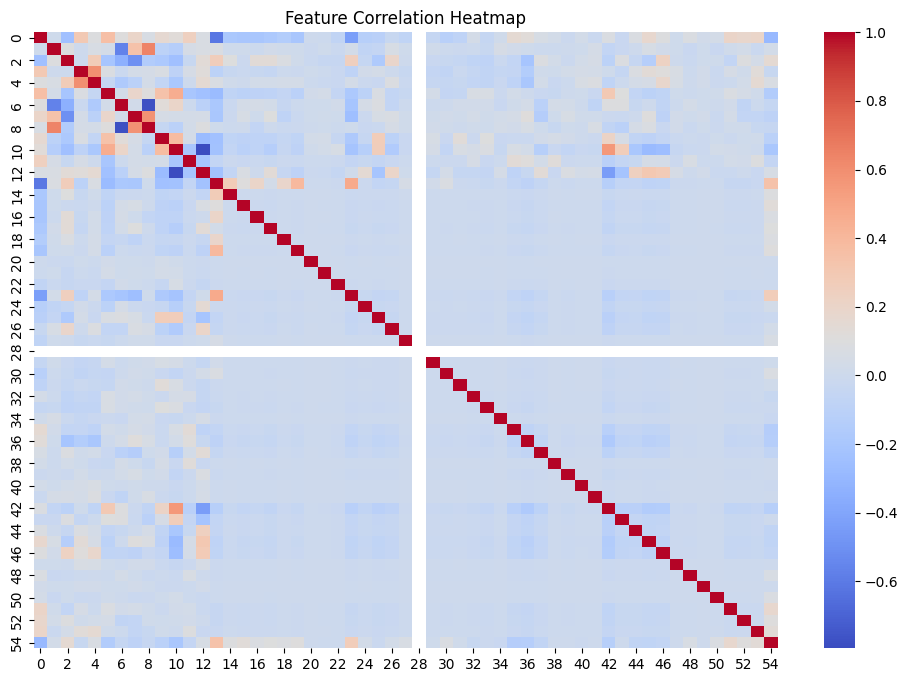

In [21]:
if df is not None:
    # Class distribution
    plt.figure(figsize=(8,4))
    sns.countplot(x=df.iloc[:,-1])
    plt.title('Cover Type Distribution')
    plt.xlabel('Cover Type')
    plt.ylabel('Count')
    plt.show()
    # Correlation heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

## 3. Data Cleaning and Preprocessing

- Handle missing values
- Encode categoricals
- Feature scaling
- Prepare features and target

In [24]:
if df is not None:
    print('Missing values per column:')
    print(df.isnull().sum())
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    if y.dtype == 'O':
        le = LabelEncoder()
        y = le.fit_transform(y)
    # Ensure y labels start at 0 for all models (especially XGBoost)
    y = y - y.min()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64
Train shape: (8000, 54) Test shape: (2000, 54)


## 4. Model Building and Evaluation

Train and evaluate Random Forest, XGBoost, and bonus models.

Random Forest Accuracy: 0.7935
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       738
           1       0.80      0.84      0.82       975
           2       0.73      0.84      0.78       118
           3       1.00      0.40      0.57        10
           4       0.71      0.15      0.25        33
           5       0.76      0.48      0.59        60
           6       0.96      0.76      0.85        66

    accuracy                           0.79      2000
   macro avg       0.82      0.61      0.66      2000
weighted avg       0.79      0.79      0.79      2000

XGBoost Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       738
           1       0.80      0.85      0.83       975
           2       0.76      0.82      0.79       118
           3       0.56      0.50      0.53        10
           4       0.83      0.30      0.44        33
           5       0.6

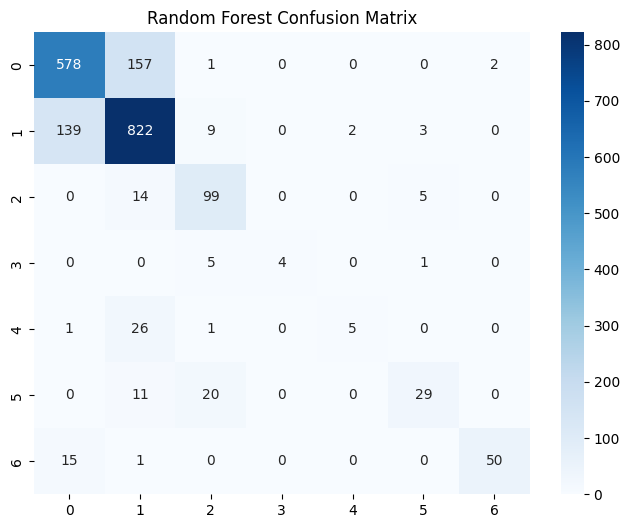

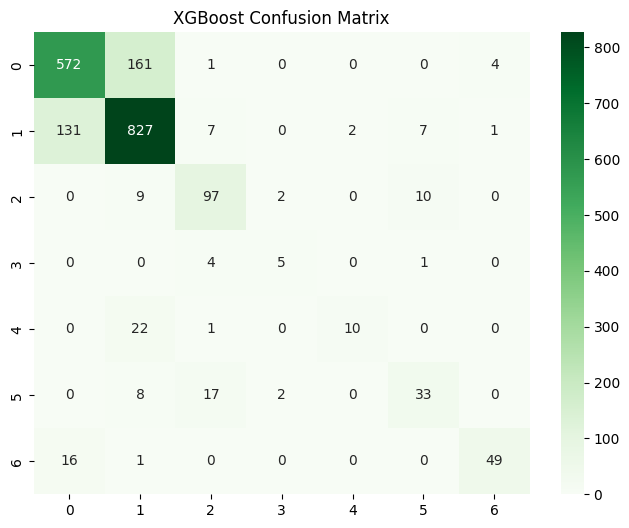

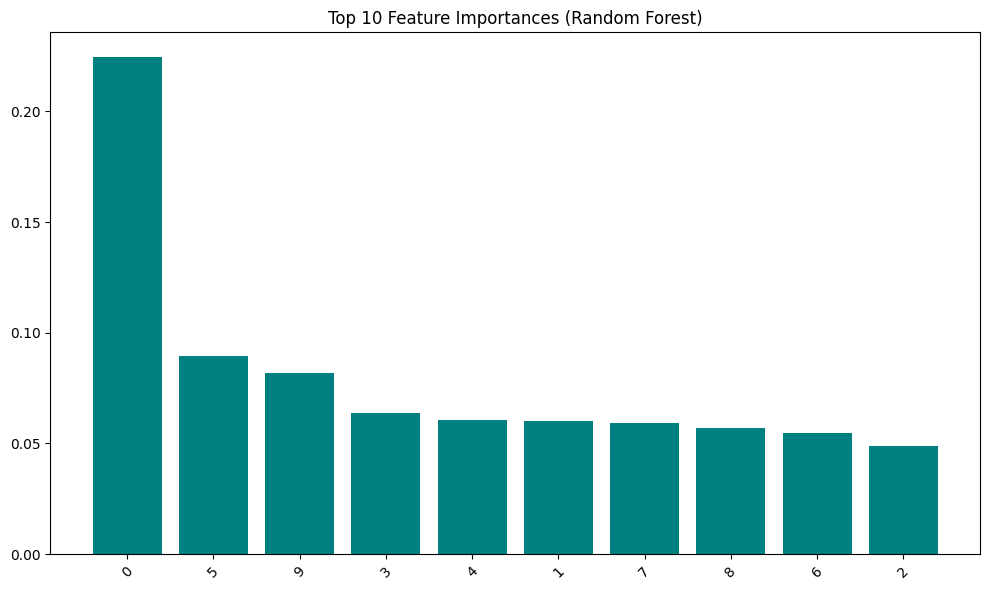

In [25]:
if df is not None:
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))
    # XGBoost
    xgb = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))
    # Confusion Matrices
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    plt.show()
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
    plt.title('XGBoost Confusion Matrix')
    plt.show()
    # Feature Importance (Random Forest)
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:][::-1]
    plt.figure(figsize=(10,6))
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.bar(range(10), importances[indices], align='center', color='teal')
    plt.xticks(range(10), [X.columns[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

## 5. Bonus: SMOTE, Logistic Regression, Decision Tree

Handle class imbalance and compare additional models.

In [26]:
if df is not None:
    # SMOTE + Random Forest
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_res, y_res)
    y_pred_smote = rf_smote.predict(X_test)
    print('Random Forest (SMOTE) Accuracy:', accuracy_score(y_test, y_pred_smote))
    print(classification_report(y_test, y_pred_smote))
    # Logistic Regression
    lr = LogisticRegression(max_iter=200, solver='lbfgs')
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
    print(classification_report(y_test, y_pred_lr))
    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
    print(classification_report(y_test, y_pred_dt))

Random Forest (SMOTE) Accuracy: 0.788
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       738
           1       0.83      0.80      0.81       975
           2       0.70      0.83      0.76       118
           3       1.00      0.50      0.67        10
           4       0.47      0.48      0.48        33
           5       0.58      0.62      0.60        60
           6       0.78      0.86      0.82        66

    accuracy                           0.79      2000
   macro avg       0.73      0.70      0.70      2000
weighted avg       0.79      0.79      0.79      2000

Logistic Regression Accuracy: 0.713
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       738
           1       0.74      0.78      0.76       975
           2       0.62      0.75      0.68       118
           3       0.43      0.30      0.35        10
           4       0.00      0.00      0.00        33
    

## 6. Hyperparameter Tuning (Random Forest & XGBoost)

Use GridSearchCV to find the best parameters for both models.

In [27]:
from sklearn.model_selection import GridSearchCV

if df is not None:
    # Random Forest hyperparameter tuning
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, scoring='accuracy')
    rf_grid.fit(X_train, y_train)
    print('Best Random Forest Params:', rf_grid.best_params_)
    print('Best Random Forest CV Score:', rf_grid.best_score_)
    rf_best = rf_grid.best_estimator_
    y_pred_rf_best = rf_best.predict(X_test)
    print('Tuned Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf_best))
    print(classification_report(y_test, y_pred_rf_best))
    # XGBoost hyperparameter tuning
    xgb_params = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.1, 0.01],
        'subsample': [0.8, 1],
    }
    xgb_grid = GridSearchCV(XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'), xgb_params, cv=3, n_jobs=-1, scoring='accuracy')
    xgb_grid.fit(X_train, y_train)
    print('Best XGBoost Params:', xgb_grid.best_params_)
    print('Best XGBoost CV Score:', xgb_grid.best_score_)
    xgb_best = xgb_grid.best_estimator_
    y_pred_xgb_best = xgb_best.predict(X_test)
    print('Tuned XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb_best))
    print(classification_report(y_test, y_pred_xgb_best))

Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score: 0.7879993526690634
Tuned Random Forest Accuracy: 0.794
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       738
           1       0.80      0.85      0.82       975
           2       0.75      0.84      0.79       118
           3       1.00      0.40      0.57        10
           4       0.86      0.18      0.30        33
           5       0.71      0.48      0.57        60
           6       0.94      0.77      0.85        66

    accuracy                           0.79      2000
   macro avg       0.84      0.61      0.67      2000
weighted avg       0.80      0.79      0.79      2000

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Best XGBoost CV Score: 0.7986249468253828
Tuned XGBoost Accuracy: 0.8125
              precision    recall

## 6. Hyperparameter Tuning (Random Forest & XGBoost)

Use GridSearchCV to find the best parameters for both models.